# Dataset for Clustering Project

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import xlrd
import seaborn as sns
from collections import OrderedDict
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
from sklearn.metrics import adjusted_rand_score
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.metrics import pairwise_distances
from sklearn.metrics import davies_bouldin_score
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
molecule = pd.read_csv("Dataset for Clustering Project.csv")

In [3]:
molecule.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11481 entries, 0 to 11480
Columns: 341 entries, ID to zagreb
dtypes: float64(340), int64(1)
memory usage: 29.9 MB


In [4]:
molecule.head()

,ID,AM1_dipole,AM1_E,AM1_Eele,AM1_HF,AM1_HOMO,AM1_IP,AM1_LUMO,apol,ASA,...,vsurf_Wp3,vsurf_Wp4,vsurf_Wp5,vsurf_Wp6,vsurf_Wp7,vsurf_Wp8,Weight,weinerPath,weinerPol,zagreb
0,1,1.319920,-69493.070,-455029.72,85.696503,-8.01281,8.01281,-0.41004,41.208309,462.93146,...,89.250,16.125,6.875,2.00,0.000,0.0,268.74698,866.0,32.0,104.0
1,2,3.326244,-118221.550,-873203.50,-48.735088,-8.71407,8.71407,0.08265,60.571033,719.67706,...,222.375,59.375,22.000,5.75,0.125,0.0,396.44699,2692.0,45.0,146.0
2,3,3.418354,-118221.350,-873296.81,-48.540100,-8.70629,8.70629,0.05556,60.571033,711.94922,...,228.375,59.750,23.375,6.75,0.500,0.0,396.44699,2692.0,45.0,146.0
3,4,2.090005,-103461.740,-796599.50,13.063520,-8.65922,8.65922,0.04051,58.967033,667.70203,...,197.250,53.500,18.625,5.00,0.250,0.0,364.44901,2052.0,41.0,136.0
4,5,5.202969,-76984.094,-451933.41,-84.414909,-9.27016,9.27016,-0.98585,36.275928,451.24734,...,52.125,6.125,2.125,0.25,0.000,0.0,254.24100,670.0,31.0,102.0


In [5]:
molecule.shape

(11481, 341)

In [6]:
molecule.isnull().sum()

ID              0
AM1_dipole      2
AM1_E         164
AM1_Eele      164
AM1_HF        164
             ... 
vsurf_Wp8       2
Weight          2
weinerPath      2
weinerPol       2
zagreb          2
Length: 341, dtype: int64

In [7]:
molecule = molecule.dropna()

In [8]:
molecule.isnull().sum()

ID            0
AM1_dipole    0
AM1_E         0
AM1_Eele      0
AM1_HF        0
             ..
vsurf_Wp8     0
Weight        0
weinerPath    0
weinerPol     0
zagreb        0
Length: 341, dtype: int64

In [9]:
molecule.shape

(11132, 341)

In [10]:
molecule.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,11132.0,5736.079860,3318.254042,1.000000e+00,2853.750000,5726.500000,8605.250000,11495.000000
AM1_dipole,11132.0,4.250251,2.434699,1.000000e-03,2.654771,3.943258,5.324716,34.555798
AM1_E,11132.0,-106905.805131,30286.545243,-2.670421e+05,-122373.580000,-102779.090000,-85951.406500,-30241.963000
AM1_Eele,11132.0,-790302.577994,345324.379012,-3.013898e+06,-937494.082500,-712764.595000,-553723.560000,-102220.360000
AM1_HF,11132.0,22.531817,200.537476,-5.831885e+02,-62.243113,1.125485,64.618948,1601.576400
...,...,...,...,...,...,...,...,...
vsurf_Wp8,11132.0,0.104024,0.535674,0.000000e+00,0.000000,0.000000,0.000000,5.125000
Weight,11132.0,379.276937,99.165031,8.904999e+01,309.412990,362.428990,436.575990,877.552000
weinerPath,11132.0,2460.828872,2809.984191,2.900000e+01,1057.000000,1677.500000,2852.000000,35333.000000
weinerPol,11132.0,41.137442,13.228718,4.000000e+00,32.000000,39.000000,49.000000,107.000000


In [11]:
label_encoder = LabelEncoder()

true_labels = label_encoder.fit_transform(molecule['ID'])
true_labels[:]

array([    0,     1,     2, ..., 11129, 11130, 11131], dtype=int64)

In [12]:
label_encoder.classes_

array([    1,     2,     3, ..., 11493, 11494, 11495], dtype=int64)

In [13]:
n_clusters = len(label_encoder.classes_)

In [14]:
# Putting molecule into an array, and storing it in X

X = molecule.values[:]

In [15]:
X[:]

array([[ 1.0000000e+00,  1.3199201e+00, -6.9493070e+04, ...,
         8.6600000e+02,  3.2000000e+01,  1.0400000e+02],
       [ 2.0000000e+00,  3.3262436e+00, -1.1822155e+05, ...,
         2.6920000e+03,  4.5000000e+01,  1.4600000e+02],
       [ 3.0000000e+00,  3.4183543e+00, -1.1822135e+05, ...,
         2.6920000e+03,  4.5000000e+01,  1.4600000e+02],
       ...,
       [ 1.1493000e+04,  4.7929411e+00, -7.5167805e+04, ...,
         7.6400000e+02,  2.6000000e+01,  9.2000000e+01],
       [ 1.1494000e+04,  4.7317615e+00, -6.7752320e+04, ...,
         6.2500000e+02,  2.4000000e+01,  1.0200000e+02],
       [ 1.1495000e+04,  1.6933370e+00, -8.8069172e+04, ...,
         1.0620000e+03,  3.5000000e+01,  1.2000000e+02]])

In [16]:
# Standardization/Normalization using standard scaler

scaler = StandardScaler()
stdmolecule = scaler.fit_transform(X)

In [17]:
stdmolecule[:]

array([[-1.72842025, -1.20362391,  1.23534775, ..., -0.56758345,
        -0.69075869, -0.89443192],
       [-1.72811887, -0.37953292, -0.37363962, ...,  0.08227146,
         0.29199593,  0.19058255],
       [-1.72781749, -0.34169874, -0.37363301, ...,  0.08227146,
         0.29199593,  0.19058255],
       ...,
       [ 1.7350024 ,  0.22290841,  1.04797115, ..., -0.60388421,
        -1.14433774, -1.20443606],
       [ 1.73530378,  0.19777908,  1.29282635, ..., -0.65335291,
        -1.29553076, -0.94609928],
       [ 1.73560516, -1.05024411,  0.62197517, ..., -0.49782903,
        -0.46396916, -0.48109307]])

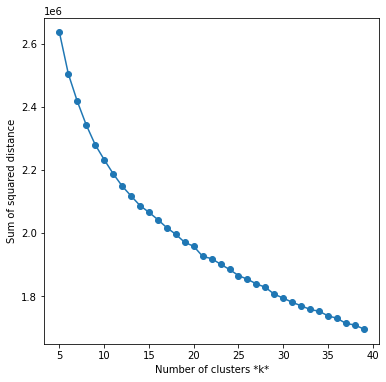

In [18]:
sse = []
list_k = list(range(5,40))

for k in list_k:
    #kmeans = KMeans(n_clusters=k)
    kmeans = KMeans(
    init ='k-means++',
    n_clusters = k,
    n_init = 50,
    max_iter = 300,
    random_state =42
)
    kmeans.fit(stdmolecule)
    sse.append(kmeans.inertia_)
    
# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance');

In [19]:
kmeans.labels_[:]

array([25,  2,  2, ..., 27, 32, 38])

In [20]:
y_kmeans = kmeans.fit_predict(stdmolecule)

In [21]:
centroids = kmeans.cluster_centers_

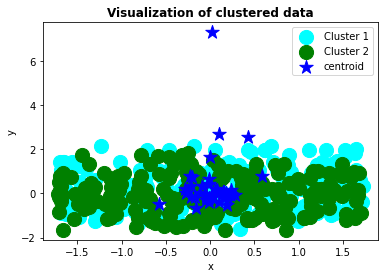

In [22]:
plt.scatter(stdmolecule[y_kmeans == 0, 0], stdmolecule[y_kmeans == 0, 1], s = 200, c = 'cyan', label = 'Cluster 1') 
plt.scatter(stdmolecule[y_kmeans == 1, 0], stdmolecule[y_kmeans == 1, 1], s = 200, c = 'green', label = 'Cluster 2') 


#plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=200, c='black', label='centroids')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=200, c='b', label='centroid')

plt.ylabel('y')
plt.xlabel('x')
plt.legend()
plt.title('Visualization of clustered data', fontweight='bold')
plt.show()

In [23]:
# Silhouette coefficient is a measure of cluster cohesion and separation

silhouette_coefficient = []
for k in range(5,20):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(stdmolecule)
        score = silhouette_score(stdmolecule, kmeans.labels_)
        silhouette_coefficient.append(score)
score

0.06563276657549817

In [25]:
kmeans_silhouette = silhouette_score(
    stdmolecule, kmeans.labels_
).round(2)

kmeans_silhouette

0.07

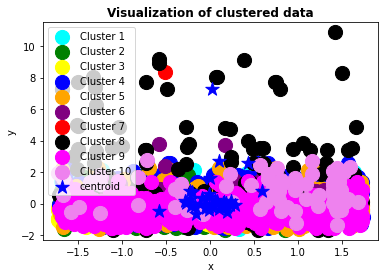

In [26]:
plt.scatter(stdmolecule[y_kmeans == 0, 0], stdmolecule[y_kmeans == 0, 1], s = 200, c = 'cyan', label = 'Cluster 1') 
plt.scatter(stdmolecule[y_kmeans == 1, 0], stdmolecule[y_kmeans == 1, 1], s = 200, c = 'green', label = 'Cluster 2') 
plt.scatter(stdmolecule[y_kmeans == 2, 0], stdmolecule[y_kmeans == 2, 1], s = 200, c = 'yellow', label = 'Cluster 3')
plt.scatter(stdmolecule[y_kmeans == 3, 0], stdmolecule[y_kmeans == 3, 1], s = 200, c = 'blue', label = 'Cluster 4') 
plt.scatter(stdmolecule[y_kmeans == 4, 0], stdmolecule[y_kmeans == 4, 1], s = 200, c = 'orange', label = 'Cluster 5') 
plt.scatter(stdmolecule[y_kmeans == 5, 0], stdmolecule[y_kmeans == 5, 1], s = 200, c = 'purple', label = 'Cluster 6')
plt.scatter(stdmolecule[y_kmeans == 6, 0], stdmolecule[y_kmeans == 6, 1], s = 200, c = 'red', label = 'Cluster 7')
plt.scatter(stdmolecule[y_kmeans == 7, 0], stdmolecule[y_kmeans == 7, 1], s = 200, c = 'black', label = 'Cluster 8')
plt.scatter(stdmolecule[y_kmeans == 8, 0], stdmolecule[y_kmeans == 8, 1], s = 200, c = 'magenta', label = 'Cluster 9')
plt.scatter(stdmolecule[y_kmeans == 9, 0], stdmolecule[y_kmeans == 9, 1], s = 200, c = 'violet', label = 'Cluster 10')

#plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=200, c='black', label='centroids')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=200, c='b', label='centroid')

plt.ylabel('y')
plt.xlabel('x')
plt.legend()
plt.title('Visualization of clustered data', fontweight='bold')
plt.show()

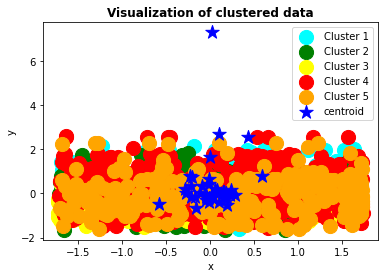

In [27]:
plt.scatter(stdmolecule[y_kmeans == 0, 0], stdmolecule[y_kmeans == 0, 1], s = 200, c = 'cyan', label = 'Cluster 1') 
plt.scatter(stdmolecule[y_kmeans == 1, 0], stdmolecule[y_kmeans == 1, 1], s = 200, c = 'green', label = 'Cluster 2') 
plt.scatter(stdmolecule[y_kmeans == 2, 0], stdmolecule[y_kmeans == 2, 1], s = 200, c = 'yellow', label = 'Cluster 3')
plt.scatter(stdmolecule[y_kmeans == 3, 0], stdmolecule[y_kmeans == 3, 1], s = 200, c = 'red', label = 'Cluster 4')
plt.scatter(stdmolecule[y_kmeans == 4, 0], stdmolecule[y_kmeans == 4, 1], s = 200, c = 'orange', label = 'Cluster 5')

#plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=200, c='black', label='centroids')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=200, c='b', label='centroid')

plt.ylabel('y')
plt.xlabel('x')
plt.legend()
plt.title('Visualization of clustered data', fontweight='bold')
plt.show()

In [27]:
kmeans_silhouette = silhouette_score(
    stdmolecule, kmeans.labels_
).round(2)

kmeans_silhouette

0.07

## Kmeans clustering with principal component analysis (PCA)

In [28]:
pca = PCA()
pca.fit(stdmolecule)

PCA()

In [29]:
pca.explained_variance_ratio_

array([2.73870701e-01, 1.22915217e-01, 6.12695214e-02, 4.08032279e-02,
       3.92455014e-02, 3.61571899e-02, 2.78069875e-02, 2.49001806e-02,
       2.16332734e-02, 1.97739822e-02, 1.69653707e-02, 1.57485321e-02,
       1.46837668e-02, 1.41629607e-02, 1.15682969e-02, 1.10159591e-02,
       9.76032775e-03, 9.11079169e-03, 7.86602797e-03, 7.40193420e-03,
       7.18381851e-03, 6.57236261e-03, 6.37522633e-03, 6.02932303e-03,
       5.97461572e-03, 5.32079426e-03, 5.18690970e-03, 5.11886486e-03,
       4.74843467e-03, 4.44725113e-03, 4.25673550e-03, 4.19303200e-03,
       3.99294839e-03, 3.88001816e-03, 3.76187931e-03, 3.58984060e-03,
       3.42143336e-03, 3.37864245e-03, 3.24431385e-03, 3.20296541e-03,
       3.13113535e-03, 3.01459109e-03, 2.98711979e-03, 2.94789392e-03,
       2.92791586e-03, 2.80206260e-03, 2.77699923e-03, 2.63024117e-03,
       2.60438382e-03, 2.56171331e-03, 2.55101584e-03, 2.48048448e-03,
       2.40736344e-03, 2.30323892e-03, 2.24200607e-03, 2.20799316e-03,
      

Text(0, 0.5, 'Cumulative Explained Variance')

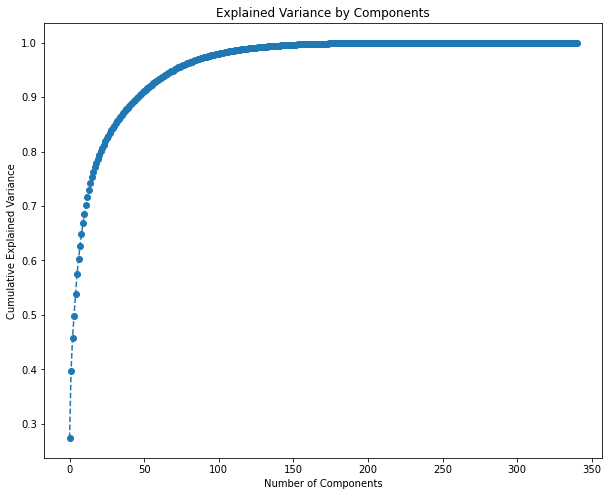

In [30]:
plt.figure(figsize = (10,8))
plt.plot(range(0,341), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

In [31]:
pca = PCA(n_components = 2)

In [32]:
pca.fit(stdmolecule)

PCA(n_components=2)

In [33]:
pca.transform(stdmolecule)

array([[-10.76693333,  -6.67981011],
       [  3.94466996,   2.54132176],
       [  3.96860344,   2.92921984],
       ...,
       [ -9.63717749,   0.80358845],
       [-11.13521043,   1.40652679],
       [ -5.4662648 ,   0.35824935]])

In [34]:
scores_pca = pca.transform(stdmolecule)

In [35]:
wcss = []
for k in range(0,20):
    kmeans_pca = KMeans(n_clusters = k, init = 'k-means++', n_init = 50, max_iter = 300, random_state=42)

kmeans_pca.fit(scores_pca)
wcss.append(kmeans_pca.inertia_)

In [36]:
kmeans_pca.fit(scores_pca)

KMeans(n_clusters=19, n_init=50, random_state=42)

In [37]:
pred = kmeans_pca.predict(scores_pca)

In [38]:
pca_centroid = kmeans_pca.cluster_centers_

In [39]:
molecule_pca_kmeans = pd.concat([molecule.reset_index(drop=True), pd.DataFrame(scores_pca)], axis=1)
molecule_pca_kmeans.columns.values[-2: ] = ['Component 1', 'Component 2']
molecule_pca_kmeans['Molecule k-means PCA'] = kmeans_pca.labels_

In [40]:
molecule_pca_kmeans.head()

,ID,AM1_dipole,AM1_E,AM1_Eele,AM1_HF,AM1_HOMO,AM1_IP,AM1_LUMO,apol,ASA,...,vsurf_Wp6,vsurf_Wp7,vsurf_Wp8,Weight,weinerPath,weinerPol,zagreb,Component 1,Component 2,Molecule k-means PCA
0,1,1.319920,-69493.070,-455029.72,85.696503,-8.01281,8.01281,-0.41004,41.208309,462.93146,...,2.00,0.000,0.0,268.74698,866.0,32.0,104.0,-10.766933,-6.679810,8
1,2,3.326244,-118221.550,-873203.50,-48.735088,-8.71407,8.71407,0.08265,60.571033,719.67706,...,5.75,0.125,0.0,396.44699,2692.0,45.0,146.0,3.944670,2.541322,5
2,3,3.418354,-118221.350,-873296.81,-48.540100,-8.70629,8.70629,0.05556,60.571033,711.94922,...,6.75,0.500,0.0,396.44699,2692.0,45.0,146.0,3.968603,2.929220,5
3,4,2.090005,-103461.740,-796599.50,13.063520,-8.65922,8.65922,0.04051,58.967033,667.70203,...,5.00,0.250,0.0,364.44901,2052.0,41.0,136.0,1.567670,0.745214,5
4,5,5.202969,-76984.094,-451933.41,-84.414909,-9.27016,9.27016,-0.98585,36.275928,451.24734,...,0.25,0.000,0.0,254.24100,670.0,31.0,102.0,-12.290886,3.260601,10


In [41]:
molecule_pca_kmeans['Cluster'] = molecule_pca_kmeans['Molecule k-means PCA'].map({0:'cluster 1',
                                                                                1:'cluster 2',
                                                                                2:'cluster 3',
                                                                                3:'cluster 4',
                                                                                4:'cluster 5',
                                                                                5:'cluster 6',
                                                                                6:'cluster 7',
                                                                                7:'cluster 8',
                                                                                8:'cluster 9',
                                                                                9:'cluster 10',
                                                                                10:'cluster 11',
                                                                                11:'cluster 12',
                                                                                12:'cluster 13',
                                                                                13:'cluster 14',
                                                                                14:'cluster 15',
                                                                                15:'cluster 16',
                                                                                16:'cluster 17',
                                                                                17:'cluster 18',
                                                                                18:'cluster 19'})

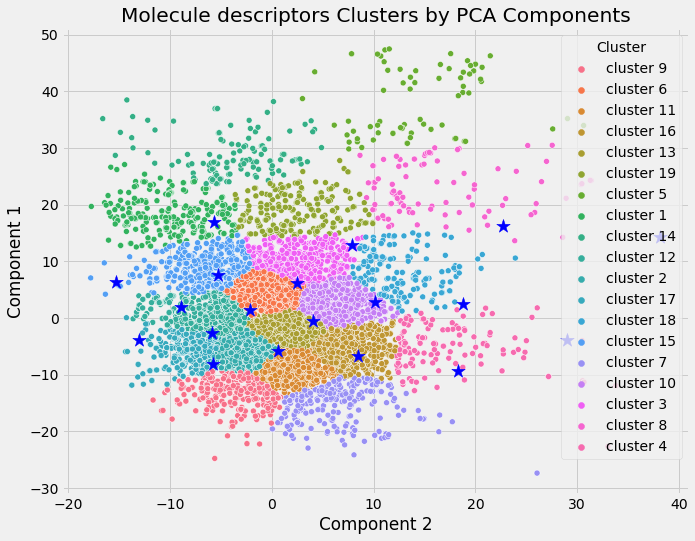

In [88]:
x_axis = molecule_pca_kmeans['Component 2']
y_axis = molecule_pca_kmeans['Component 1']
plt.figure(figsize =(10,8))
sns.scatterplot(x_axis, y_axis, hue = molecule_pca_kmeans['Cluster'])

plt.scatter(pca_centroid[:, 0], pca_centroid[:, 1], marker='*', s=200, c='b', label='centroid')

plt.title('Molecule descriptors Clusters by PCA Components')
plt.show()

## Evaluations

In [43]:
#The rand index does not ensure to obtain a value close to 0.0 for a random 
#labelling

metrics.rand_score(true_labels, pred)

0.92762693190974

In [44]:
#Permtating the predicted labels gives a better score.
#Poorly agreeing labels (eg independent labelling) have lower scores, tending to
#negative or close to zero.

metrics.adjusted_rand_score(true_labels, pred)

0.0

In [45]:
#Independent labellings have non-positive scores

metrics.adjusted_mutual_info_score(true_labels, pred)

1.631040796287657e-11

In [46]:
#Higher scores are better

metrics.homogeneity_score(true_labels, pred)

0.2932958769032642

In [47]:
metrics.completeness_score(true_labels, pred)

1.0000000000000002

In [48]:
metrics.v_measure_score(true_labels, pred)

0.4535634608308616

In [49]:
metrics.accuracy_score(true_labels, pred)

0.0

In [50]:
#Independent labellings have zero scores

metrics.fowlkes_mallows_score(true_labels, pred)

0.0

In [51]:
#Higher scores indicate better defined clusters

metrics.calinski_harabasz_score(scores_pca, pred)

6818.259607691949

In [52]:
#Zero is the lowest possible score
#Values close to 0 indicate a better partition

davies_bouldin_score(scores_pca, pred)

0.8253424997646897

In [53]:
#Higher silhouette score relates to a model with better defined clusters.
#Scores around 0 indicate overlapping clusters

metrics.silhouette_score(scores_pca, pred, metric ='euclidean')

0.33127012278446794

In [54]:
molecule_pca_kmeans['cluster'] = pred
molecule_pca_kmeans['cluster'].value_counts()

12    1172
1     1098
11    1029
5      968
10     963
15     801
14     772
16     749
9      715
8      650
2      594
0      328
6      316
18     242
17     236
3      185
13     142
7      101
4       71
Name: cluster, dtype: int64

In [55]:
molecule_pca_kmeans_index = molecule_pca_kmeans

In [56]:
molecule_index = molecule.index[:]

In [57]:
molecule_pca_kmeans_index = molecule_pca_kmeans.index[:]

In [58]:
molecule_pca_kmeans_map = pd.DataFrame()
molecule_pca_kmeans_map['molecule_pca_kmeans_index'] = molecule_pca_kmeans.index.values
molecule_pca_kmeans_map['cluster'] = kmeans.labels_


In [59]:
pd.set_option('display.max_rows',1173)

molecule_pca_kmeans_map[molecule_pca_kmeans_map.cluster == 0]

,molecule_pca_kmeans_index,cluster
52,52,0
53,53,0
55,55,0
61,61,0
102,102,0
103,103,0
117,117,0
166,166,0
214,214,0
218,218,0


### dimensionality reduction using Principal component Analysis (PCA)


In [61]:
preprocessor = Pipeline(
    [
        ("scaler", MinMaxScaler()),
        ("pca", PCA(n_components=2, random_state=42)),
    ]
)

In [62]:
# kmeans clustering pipeline

clusterer = Pipeline(
    [
        (
            "kmeans",
            KMeans(
                n_clusters=k,
                init="k-means++",
                n_init=50,
                max_iter=300,
                random_state=42,
            ),
        ),
    ]
)

In [63]:
# build an end to end k-means clustering pipeline by passing the "preprocessor" and "clusterer" pipelins to Piprline

pipe = Pipeline(
    [
        ("preprocessor", preprocessor),
        ("clusterer", clusterer)
    ]
)

In [64]:
pipe.fit(stdmolecule)

Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('scaler', MinMaxScaler()),
                                 ('pca',
                                  PCA(n_components=2, random_state=42))])),
                ('clusterer',
                 Pipeline(steps=[('kmeans',
                                  KMeans(n_clusters=19, n_init=50,
                                         random_state=42))]))])

In [65]:
preprocessed_stdmolecule = pipe["preprocessor"].transform(stdmolecule)

In [66]:
predicted_labels = pipe["clusterer"]["kmeans"].labels_

In [67]:
pcadf = pd.DataFrame(
    pipe["preprocessor"].transform(stdmolecule),
    columns=["component_1", "component_2"],
)

pcadf["predicted_cluster"] = pipe["clusterer"]["kmeans"].labels_
pcadf["true_label"] = label_encoder.inverse_transform(true_labels)

In [68]:
pcadf.head

<bound method NDFrame.head of        component_1  component_2  predicted_cluster  true_label
0        -1.595147    -0.430237                  7           1
1         0.327313     0.436930                  6           2
2         0.331174     0.486315                  6           3
3         0.090273     0.249552                  6           4
4        -1.686143     0.352126                 13           5
...            ...          ...                ...         ...
11127    -0.575957     0.703776                  4       11491
11128    -0.227432    -0.063450                  0       11492
11129    -1.278922    -0.015114                 14       11493
11130    -1.360399     0.096421                 14       11494
11131    -0.620584    -0.077911                  0       11495

[11132 rows x 4 columns]>

In [69]:
centroids = kmeans.cluster_centers_

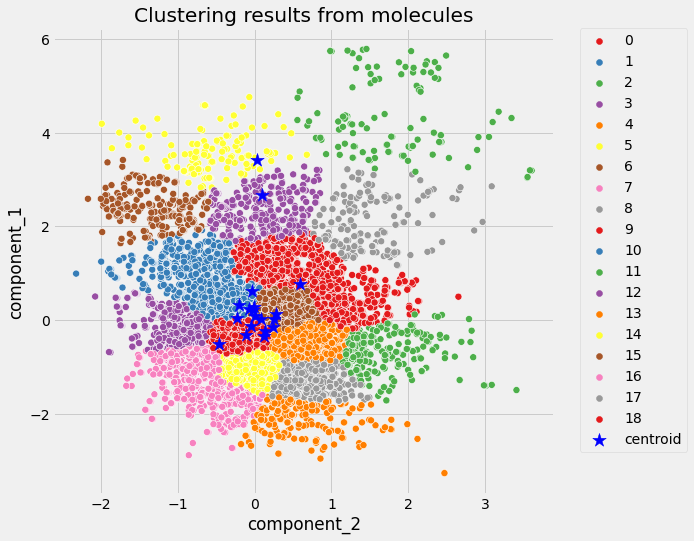

In [70]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(8,8))

x_axis = pcadf["component_2"]
y_axis = pcadf["component_1"]

scat = sns.scatterplot(
    x_axis, 
    y_axis,
    s=50,
    hue=pcadf["predicted_cluster"],
    palette="Set1",
)

plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=200, c='b', label='centroid')

scat.set_title(
    "Clustering results from molecules"
)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

plt.show()

In [71]:
pcadf['cluster'] = pred
pcadf['cluster'].value_counts()

12    1172
1     1098
11    1029
5      968
10     963
15     801
14     772
16     749
9      715
8      650
2      594
0      328
6      316
18     242
17     236
3      185
13     142
7      101
4       71
Name: cluster, dtype: int64

In [72]:
pcadf_index = pcadf

pcadf_index = pcadf.index[:]

In [73]:
pcadf_map = pd.DataFrame()
pcadf_map['pcadf_index'] = pcadf.index.values
pcadf_map['cluster'] = kmeans.labels_


In [74]:
pd.set_option('display.max_rows',1173)

pcadf_map[pcadf_map.cluster == 0]

,pcadf_index,cluster
52,52,0
53,53,0
55,55,0
61,61,0
102,102,0
103,103,0
117,117,0
166,166,0
214,214,0
218,218,0


In [75]:
pcadf_map[pcadf_map.cluster == 1]

,pcadf_index,cluster
30,30,1
48,48,1
121,121,1
125,125,1
148,148,1
150,150,1
156,156,1
176,176,1
208,208,1
217,217,1


In [76]:
pcadf_map[pcadf_map.cluster == 10]

,pcadf_index,cluster
5,5,10
74,74,10
118,118,10
204,204,10
211,211,10
215,215,10
238,238,10
303,303,10
328,328,10
340,340,10


### Evaluations

In [77]:
#The rand index does not ensure to obtain a value close to 0.0 for a random 
#labelling

metrics.rand_score(true_labels, predicted_labels)

0.9302004873009257

In [78]:
#Permtating the predicted labels gives a better score.
#Poorly agreeing labels (eg independent labelling) have lower scores, tending to
#negative or close to zero.

metrics.adjusted_rand_score(true_labels, predicted_labels)

0.0

In [79]:
#Independent labellings have non-positive scores

metrics.adjusted_mutual_info_score(true_labels, predicted_labels)

1.1482543973571326e-11

In [80]:
#Higher scores are better

metrics.homogeneity_score(true_labels, predicted_labels)

0.29773066530525627

In [81]:
metrics.completeness_score(true_labels, predicted_labels)

1.0

In [82]:
metrics.v_measure_score(true_labels, predicted_labels)

0.458848162049439

In [83]:
metrics.accuracy_score(true_labels, predicted_labels)

0.00026949335249730504

In [84]:
#Independent labellings have zero scores

metrics.fowlkes_mallows_score(true_labels, predicted_labels)

0.0

In [85]:
#Higher scores indicate better defined clusters

metrics.calinski_harabasz_score(preprocessed_stdmolecule, predicted_labels)

7552.652666758202

In [86]:
#Zero is the lowest possible score
#Values close to 0 indicate a better partition

davies_bouldin_score(preprocessed_stdmolecule, predicted_labels)

0.8036264646544046

In [87]:
#Higher silhouette score relates to a model with better defined clusters.
#Scores around 0 indicate overlapping clusters

metrics.silhouette_score(preprocessed_stdmolecule, predicted_labels, metric ='euclidean')

0.3383578729885802

In [ ]:
# Drop the string column 'Model' since its not needed for our ML

automobile_df.drop(['Model'], axis=1, inplace=True)

In [ ]:
X["MedHouseVal"] = df["MedHouseVal"]
sns.catplot(x="MedHouseVal", y="Cluster", data=X, kind="boxen", height=6);
